# DAML notes
## 2. Summarising and visualising data
<hr style="border:2px solid black"> </hr>

## 2.1 Summary statistics 

Given a tabular dataset, it can be useful to summarise key statistics of its variables to convey as much information as simply as possible. Python has excellent functionality for doing this.

Let's load in the iris dataset that we've seen from the lectures.

In [1]:
# Get loader for the iris dataset and import pandas and numpy
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Convert into dataframe with the columns as the variable names
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


We can compute a range of summary statistics for all the variables in a single line using pandas:

In [2]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If we have a variable represented as a numpy array, we can turn to numpy functions for a similar purpose.

In [3]:
# We're going to generate 10000 dummy points
# These are sampled from a Gaussian/normal distribution with mean 3, SD 2.2

np.random.seed(42)
X = np.random.normal(3, 2.2, size=10000)

# We're now going use numpy functions to compute the mean and SD
# These should hopefully be similar to 3 and 2.2

print(f"Empirical mean of X is {X.mean():.3f}")
print(f"Empirical SD of X is {X.std():.3f}")

Empirical mean of X is 2.995
Empirical SD of X is 2.208


We can use scipy to compute skew.

In [4]:
from scipy.stats import skew

# A normal distribution has no skew, so we expect this to be around 0
print(f"Skew of X is {skew(X):.3f}")

Skew of X is 0.002


Given two variables $X$ and $Y$, the Pearson correlation coefficient $\rho_{x,y}$ gives a measure of how linear the relationship between them is. 

To demonstrate this, I am going to take the $X$ I made above, and create a $Y$ that is a linear transform of $X$. We should therefore expect $\rho_{x,y}=1$.

In [5]:
# Create Y which is linear in X
Y = 5 * X - 2

# This computes a 2x2 matrix where each element is rho_{i,j}
corrs = np.corrcoef(X, Y)

# We are interested in the off diagonal terms (which are identical)
print(f"rho_xy is {corrs[0,1]} ")

rho_xy is 1.0 


This makes sense as there is a perfect linear relationship between $X$ and $Y$. Let's now create a variable $Z$ that has nothing to do with X and check its correlation with X.

In [6]:
# Create Z which has nothing to do with X
Z = np.random.uniform(0, 1, size=10000)

# This computes a 2x2 matrix where each element is rho_{i,j}
corrs = np.corrcoef(X, Z)

# We are interested in the off diagonal terms (which are identical)
print(f"rho_xz is {corrs[0,1]} ")

rho_xz is -0.002925435018025313 


In [7]:
np.corrcoef(X, Z)

array([[ 1.        , -0.00292544],
       [-0.00292544,  1.        ]])

## 2.2 Visualising data

For plotting in Python there are two standard options. The first is to use [matplotlib](https://matplotlib.org), and the second is to used [seaborn](https://seaborn.pydata.org) which is based on matplotlib. Seaborn typically creates better-looking plots than matplotlib with less effort, but matplotlib is a lot more customisable.

I have used matplotlib for the vast majority of the plots in the lectures and labs, but you are more than welcome to use seaborn for the labs and tests if you prefer it.

> It is also possible to plot through pandas itself if you are working with a dataframe (some examples are [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html)) using matplotlib as a backend. This is quite neat but less flexible than using matplotlib directly.

The following preamble changes the defaults for matplotlib figures so they are easier to read. You will see it a lot in my code!

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt

# This just needs to be run once per instance.
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

I'll now provide code to recreate different plots from the lecture. The `fig, ax = plt.subplots()` that we use to create the figure and its axes looks a bit esoteric but you will get used to it! You can find a good explanation of why we're doing it [here](https://stackoverflow.com/questions/63039065/fig-ax-plt-subplots-meaning).

### 2.2.1 Bar plots

These are useful for visualising the distribution of a categorical variable.

<BarContainer object of 5 artists>

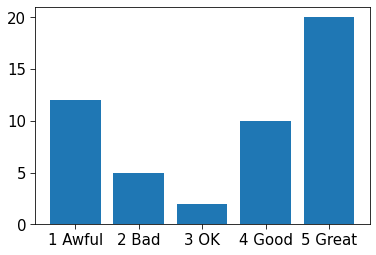

In [9]:
### Bar plot of lecture ratings

fig, ax = plt.subplots()

# Synthesise data
opinions = ["1 Awful", "2 Bad", "3 OK", "4 Good", "5 Great"]
tallies = [12, 5, 2, 10, 20]

# Plot
ax.bar(opinions, tallies)

### 2.2.2 Histograms

These are useful for visualising the distribution of a continuous variable, although you may need to tweak the bin size.

Text(0.5, 1.0, 'Exam marks (%) - 10 bins')

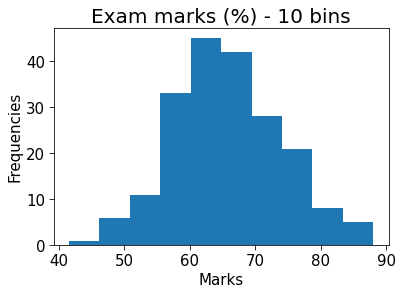

In [10]:
### Histogram of exam results


# Package for creating skewed data
from scipy.stats import skewnorm

# The number of bins. Feel free to change this!
num_bins = 10

fig, ax = plt.subplots()

# Setting a seed so the plot looks the same each time
np.random.seed(4)

# Skewed data
x = skewnorm.rvs(1, loc=60, scale=10, size=200)

ax.hist(x, bins=num_bins)

ax.set_xlabel("Marks")
ax.set_ylabel("Frequencies")
ax.set_title(f"Exam marks (%) - {num_bins} bins", fontsize=20)

### 2.2.3 Scatter plots

I would argue these are the most important plot of all. They let you compare measurements for different variables in either 2D or 3D.

Text(0, 0.5, 'Petal width (cm)')

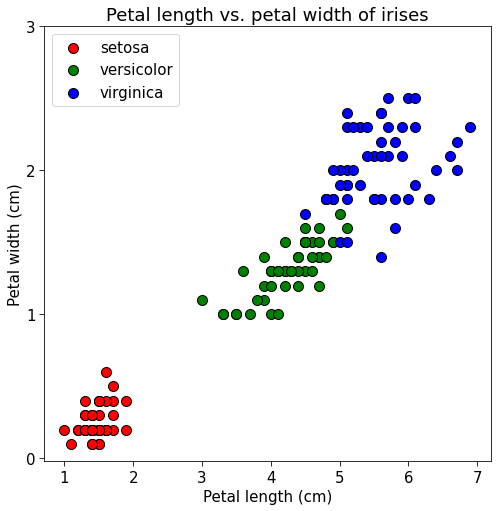

In [11]:
### Petal length vs. petal width for irises (2D)

# We loaded this above, but we'll do it again now
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a column with the species as an integer 0,1,2
# We can use different colours for different species
df.insert(4, "species", data.target)

fig, ax = plt.subplots(figsize=[8,8])
ax.scatter(
    df["petal length (cm)"][df["species"] == 0],
    df["petal width (cm)"][df["species"] == 0],
    color="r",
    edgecolor='k',
)
ax.scatter(
    df["petal length (cm)"][df["species"] == 1],
    df["petal width (cm)"][df["species"] == 1],
    color="g",
    edgecolor='k',
)
ax.scatter(
    df["petal length (cm)"][df["species"] == 2],
    df["petal width (cm)"][df["species"] == 2],
    color="b",
    edgecolor='k',
)

ax.legend(data.target_names)

# Tidy up ticks (optional)
ax.set_yticks([0, 1, 2, 3])

# Label
ax.set_title("Petal length vs. petal width of irises")
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")


Text(0.5, 0, 'Sepal length (cm)')

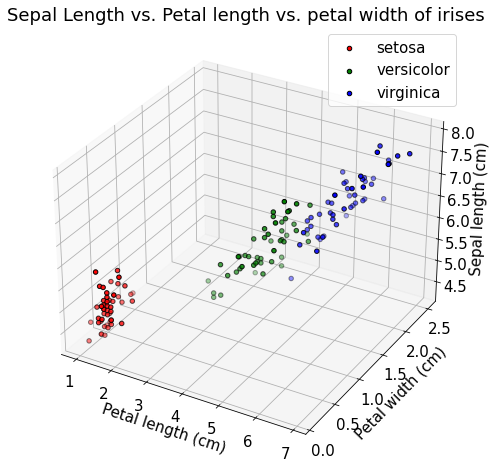

In [12]:
### Petal length vs. petal width vs. sepal length for irises (3D)

# We have to make fig, ax in a slightly different way for 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

ax.scatter(
    df["petal length (cm)"][df["species"] == 0],
    df["petal width (cm)"][df["species"] == 0],
    df["sepal length (cm)"][df["species"] == 0],
    color="r",
    edgecolor='k',
)

ax.scatter(
    df["petal length (cm)"][df["species"] == 1],
    df["petal width (cm)"][df["species"] == 1],
    df["sepal length (cm)"][df["species"] == 1],
    color="g",
    edgecolor='k',
)

ax.scatter(
    df["petal length (cm)"][df["species"] == 2],
    df["petal width (cm)"][df["species"] == 2],
    df["sepal length (cm)"][df["species"] == 2],
    color="b",
    edgecolor='k',
)
ax.legend(data.target_names)

# Label
ax.set_title("Sepal Length vs. Petal length vs. petal width of irises")
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.set_zlabel("Sepal length (cm)")


### 2.2.4 Box plots

I do use seaborn for boxplots, as they look a lot better!

<AxesSubplot:xlabel='petal length (cm)'>

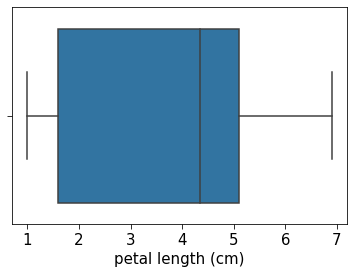

In [13]:
### Box plot of petal length for the iris dataset

# import seaborn
import seaborn as sns

sns.boxplot(x=df['petal length (cm)'])


<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

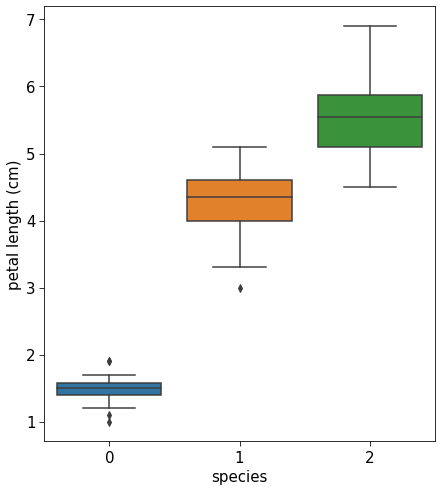

In [14]:
### Box plot of petal length for the iris dataset by species
fig = plt.figure(figsize=(7, 8))
sns.boxplot(y=df["petal length (cm)"], x=df["species"])

### 2.2.5 Heat maps

Heat maps are a nice way to visualise the magnitude of quantities in a matrix. Here we are going to use seaborn to see how different attributes correlate for a penguin dataset.

[Text(0.5, 1.0, 'Correlations for penguin attributes')]

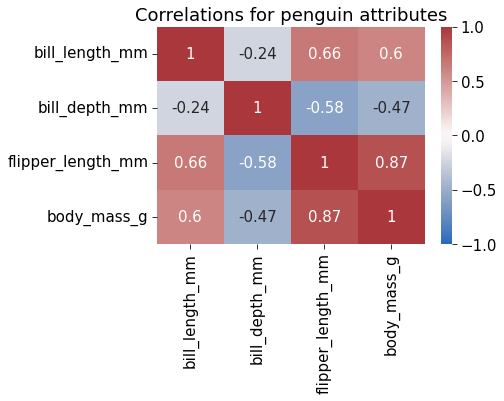

In [15]:
### Penguin correlation heatmap

# Read pandas dataset from seaborn package
df = sns.load_dataset("penguins", cache=False)

# Compute correlation matrix and plot using seaborn
# Notice have used .corr() from pandas

matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap="vlag").set(
    title="Correlations for penguin attributes"
)

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-24